### 유튜브 랭크 크롤링

- https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
- 1 ~ 10 페이지 크롤링
- 카테고리명, 채널명, 구독자 수, view 수, 동영상 개수 추출
- 추출 정보는 엑셀 저장

In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

In [12]:
import pandas as pd

In [55]:
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1"

browser = webdriver.Chrome("../../chromedriver")
browser.get(url)

for i in range(100, 0, -1):
    browser.execute_script("window.scrollTo(0,document.documentElement.scrollHeight / " + str(i) + ")")

soup = BeautifulSoup(browser.page_source, 'lxml')
soup

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12724\3186863692.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("../../chromedriver")


<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="/css/default.css?ver=2022022" rel="stylesheet"/>
<link href="/css/bootstrap.css?ver=2022022" rel="stylesheet"/>
<link href="/css/nifty.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=2022022" rel="stylesheet"/>
<link href="/css/themes/type-c/theme-well-red.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=2022022" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?2022022" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon.ico" rel="shortcut icon" type="image

In [45]:
ranking = soup.select("table > tbody > tr.aos-init")

for rank in ranking :
    c = rank.select_one("p.category").get_text().strip()
    t = rank.select_one("td.subject a").get_text().strip()
    s = rank.select_one("td.subscriber_cnt").get_text().strip()
    v = rank.select_one("td.view_cnt").get_text().strip()
    m = rank.select_one("td.video_cnt").get_text().strip()
    print(c, t, s, v, m)

[음악/댄스/가수] BLACKPINK 7510만 242억2588만 395개
[음악/댄스/가수] BANGTANTV 6900만 170억5702만 1,741개
[음악/댄스/가수] HYBE LABELS 6730만 234억4092만 924개
[음악/댄스/가수] SMTOWN 3060만 248억6745만 3,930개
[키즈/어린이] Boram Tube Vlog [보람튜브 브이로그] 2650만 110억5288만 223개
[음악/댄스/가수] 1MILLION Dance Studio 2540만 73억4939만 4,113개
[음악/댄스/가수] JYP Entertainment 2480만 167억7829만 1,481개
[음악/댄스/가수] 1theK (원더케이) 2410만 224억3591만 16,724개
[미분류] Charlie Puth 2030만 84억0732만 126개
[음악/댄스/가수] Mnet K-POP 1970만 152억3443만 28,750개
[미분류] Jimmy Kimmel Live 1870만 124억1894만 6,037개
[TV/방송] KBS WORLD TV 1810만 137억8392만 57,848개
[음악/댄스/가수] JFlaMusic 1760만 36억3965만 282개
[음악/댄스/가수] officialpsy 1720만 96억8212만 118개
[음식/요리/레시피] Jane ASMR 제인 1660만 63억4555만 1,510개
[음악/댄스/가수] BIGBANG 1480만 72억9804만 776개
[음악/댄스/가수] TWICE 1410만 35억6359만 841개
[음식/요리/레시피] Hongyu ASMR 홍유 1350만 41억6563만 498개
[미분류] Kendrick Lamar 1110만 47억3522만 18개
[키즈/어린이] 핑크퐁 (인기 동요・동화) 1080만 65억7304만 2,674개
[미분류] TheWeekndVEVO 1060만 148억2888만 132개
[키즈/어린이] Nao FunFun 1060만 479만 57개
[음악/댄스/가수] Stone Music 

In [49]:
youtube_list = []

In [50]:
for page in range(1, 11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}"
    browser = webdriver.Chrome("../../chromedriver")
    browser.get(url)
    
    for i in range(100, 0, -1):
        browser.execute_script("window.scrollTo(0,document.documentElement.scrollHeight / " + str(i) + ")")

    soup = BeautifulSoup(browser.page_source, 'lxml')
    
    ranking = soup.select("table > tbody > tr.aos-init")

    for rank in ranking :
        c = rank.select_one("p.category").get_text().strip()
        t = rank.select_one("td.subject a").get_text().strip()
        s = rank.select_one("td.subscriber_cnt").get_text().strip()
        v = rank.select_one("td.view_cnt").get_text().strip()
        m = rank.select_one("td.video_cnt").get_text().strip()
        youtube_list.append({"카테고리":c, "채널":t, "구독자 수":s, "view":v, "영상 수":m})

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12724\1029660476.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("../../chromedriver")


In [52]:
columns = ["카테고리", "채널", "구독자 수", "view", "영상 수"]
df = pd.DataFrame(youtube_list, columns=columns)
df

,카테고리,채널,구독자 수,view,영상 수
0,[음악/댄스/가수],BLACKPINK,7510만,242억2588만,395개
1,[음악/댄스/가수],BANGTANTV,6900만,170억5702만,"1,741개"
2,[음악/댄스/가수],HYBE LABELS,6730만,234억4092만,924개
3,[음악/댄스/가수],SMTOWN,3060만,248억6745만,"3,930개"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...
995,[TV/방송],KBS COMEDY: 크큭티비,61만,8억3971만,"6,702개"
996,[키즈/어린이],꾸삐KUPI,61만,3억6613만,725개
997,[게임],코아 TV,61만,5억1843만,"1,303개"
998,[미분류],강쉪,61만,1억4365만,754개


In [54]:
df.to_excel("../../data/dataset/youtube.xlsx", index=False)

---
### 데이터 로드

In [58]:
load_df = pd.read_excel("../../data/dataset/youtube.xlsx")
load_df.head()

,카테고리,채널,구독자 수,view,영상 수
0,[음악/댄스/가수],BLACKPINK,7510만,242억2588만,395개
1,[음악/댄스/가수],BANGTANTV,6900만,170억5702만,"1,741개"
2,[음악/댄스/가수],HYBE LABELS,6730만,234억4092만,924개
3,[음악/댄스/가수],SMTOWN,3060만,248억6745만,"3,930개"
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


### 데이터 탐색

In [59]:
load_df.shape

(1000, 5)

In [62]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   카테고리    1000 non-null   object
 1   채널      1000 non-null   object
 2   구독자 수   1000 non-null   object
 3   view    1000 non-null   object
 4   영상 수    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


### 데이터 전처리


#### 1) 구독자 수 컬럼에서 '만' 을 0000 로 대체 (새로운 컬럼으로 생성)

In [83]:
load_df['subscriber'] = load_df['구독자 수'].str.replace('만', '0000')

In [84]:
load_df.head()

,카테고리,채널,구독자 수,view,영상 수,subscriber
0,[음악/댄스/가수],BLACKPINK,7510만,242억2588만,395개,75100000
1,[음악/댄스/가수],BANGTANTV,6900만,170억5702만,"1,741개",69000000
2,[음악/댄스/가수],HYBE LABELS,6730만,234억4092만,924개,67300000
3,[음악/댄스/가수],SMTOWN,3060만,248억6745만,"3,930개",30600000
4,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


#### 2) subscriber 컬럼 데이터 타입 변경 ( object => int64 )

In [87]:
load_df['subscriber'] = load_df['subscriber'].astype('int64')

### 데이터 분석


#### 1) 카테고리 별 구독자 수와 채널 수 알아보기

In [105]:
load_pivot = load_df.pivot_table(values='subscriber', index='카테고리', aggfunc=['sum', 'count'])
load_pivot

,sum,count
,subscriber,subscriber
카테고리,,
[BJ/인물/연예인],94700000,62
[IT/기술/컴퓨터],8590000,7
[TV/방송],256860000,139
[게임],69340000,62
[교육/강의],26370000,21
[국내/해외/여행],5520000,6
[뉴스/정치/사회],89640000,58
[미분류],217940000,157


#### 2) 컬럼명 변경 : '전체구독자 수', '카테고리 수'

In [106]:
load_pivot.columns = ['전체 구독자 수', '카테고리 수']

#### 3) 인덱스 해제

In [107]:
load_pivot.reset_index(inplace=True)

#### 4) 전체 구독자를 기준으로 내림차순 정렬

In [108]:
load_pivot.sort_values('전체 구독자 수', ascending=False, inplace=True)

###  데이터 시각화

#### 1) pie 차트 작성 - 전체 구독자 수

In [115]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

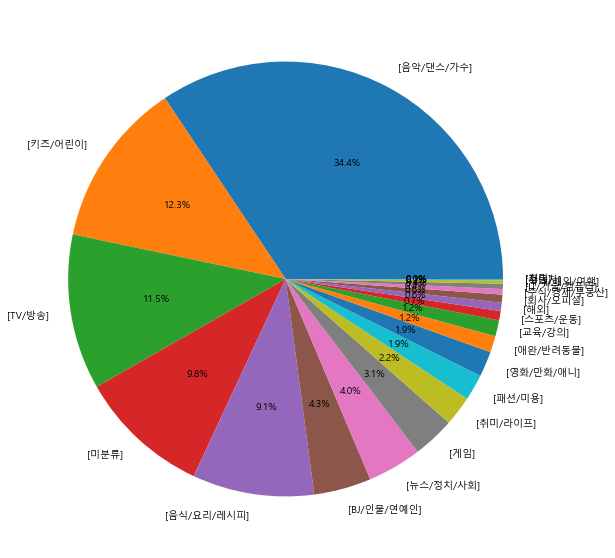

In [121]:
plt.figure(figsize=(10,10))
plt.pie(load_pivot['전체 구독자 수'], labels=load_pivot['카테고리'], autopct='%.1f%%')
plt.show()

#### 2) pie 차트 작성 - 카테고리 수

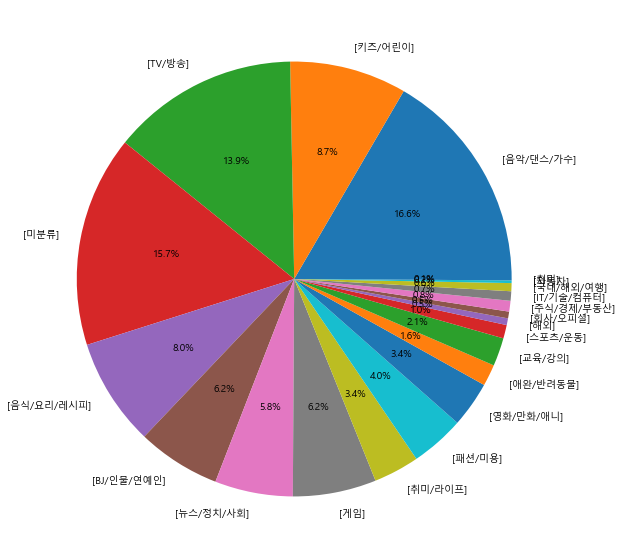

In [122]:
plt.figure(figsize=(10,10))
plt.pie(load_pivot['카테고리 수'], labels=load_pivot['카테고리'], autopct='%.1f%%')
plt.show()